In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [9]:
with open("../../data/hizandis_params.pkl", "rb") as f:
    data = pickle.load(f)

In [10]:
data

,alpha,beta,sigma,ncs,metastability
0,1.519,0.189,NaN,NaN,4.536154e-02
1,0.871,0.358,NaN,NaN,2.345615e-02
2,0.932,0.000,NaN,NaN,8.635585e-03
3,0.608,0.147,NaN,NaN,8.976171e-07
4,0.668,0.168,NaN,NaN,1.147036e-06
5,1.134,0.168,NaN,NaN,1.768242e-02
6,0.972,0.021,NaN,NaN,9.873659e-03
7,0.992,0.042,NaN,NaN,8.330302e-03
8,0.992,0.126,NaN,NaN,3.019279e-02
9,1.276,0.316,NaN,NaN,4.060595e-02


In [13]:
data = data[["alpha", "beta", "metastability"]]

In [18]:
data = data.pivot_table(values="metastability", index="alpha", columns="beta")

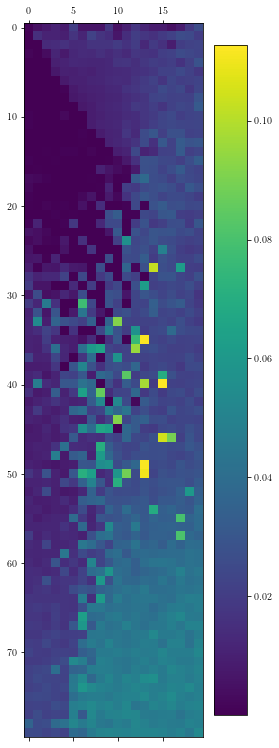

In [22]:
plt.matshow(data.values)
plt.colorbar()